In [1]:
import pandas as pd

# Load the dataset
file_path = 'Wholesale customers data.csv'
data = pd.read_csv(file_path)

# Drop the Region column
data = data.drop(columns=['Region'])
data.head()  # Display the first few rows of the modified dataset

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185


In [2]:
# Filter the data for clients that are restaurants, hotels, and caf�s (Channel = 2)
filtered_data = data[data['Channel'] == 2].drop(columns=['Channel'])
filtered_data.head()  # Display the first few rows of the filtered dataset

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451


In [3]:
# Normalize the data by computing the proportionate spending per product category
normalized_data = filtered_data.div(filtered_data.sum(axis=1), axis=0)
normalized_data.head()  # Display the first few rows of the normalized dataset

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.371394,0.283068,0.221652,0.006273,0.078389,0.039224
1,0.212139,0.294896,0.287621,0.052967,0.098990,0.053388
2,0.173532,0.240590,0.209888,0.065692,0.096039,0.214258
4,0.490564,0.117354,0.156139,0.084924,0.038547,0.112473
5,0.352415,0.309210,0.191913,0.024934,0.067203,0.054324


In [4]:
from sklearn.preprocessing import StandardScaler

# Standardize the normalized data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(normalized_data)

# Convert back to DataFrame for easier handling
standardized_data_df = pd.DataFrame(standardized_data, columns=normalized_data.columns)
standardized_data_df.head()  # Display the first few rows of the standardized dataset

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.979769,0.701156,-1.109689,-0.696614,-1.049178,-0.008535
1,0.074523,0.835727,-0.528845,0.268920,-0.756990,0.394256
2,-0.144927,0.217881,-1.213271,0.532057,-0.798839,4.969002
3,1.657158,-1.184202,-1.686523,0.929731,-1.614262,2.074483
4,0.871886,0.998584,-1.371536,-0.310739,-1.207823,0.420884


In [5]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\LucaH\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
from sklearn.preprocessing import StandardScaler

# Standardize the normalized data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(normalized_data)

# Convert back to DataFrame for easier handling
standardized_data_df = pd.DataFrame(standardized_data, columns=normalized_data.columns)
standardized_data_df.head()  # Display the first few rows of the standardized dataset

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.979769,0.701156,-1.109689,-0.696614,-1.049178,-0.008535
1,0.074523,0.835727,-0.528845,0.268920,-0.756990,0.394256
2,-0.144927,0.217881,-1.213271,0.532057,-0.798839,4.969002
3,1.657158,-1.184202,-1.686523,0.929731,-1.614262,2.074483
4,0.871886,0.998584,-1.371536,-0.310739,-1.207823,0.420884


In [7]:
from sklearn.cluster import KMeans

# Perform K-means clustering with K=4
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(standardized_data)

# Add the cluster labels to the standardized data
standardized_data_df['Cluster'] = clusters
standardized_data_df.head()  # Display the first few rows with cluster labels

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,0.979769,0.701156,-1.109689,-0.696614,-1.049178,-0.008535,2
1,0.074523,0.835727,-0.528845,0.268920,-0.756990,0.394256,0
2,-0.144927,0.217881,-1.213271,0.532057,-0.798839,4.969002,2
3,1.657158,-1.184202,-1.686523,0.929731,-1.614262,2.074483,2
4,0.871886,0.998584,-1.371536,-0.310739,-1.207823,0.420884,2


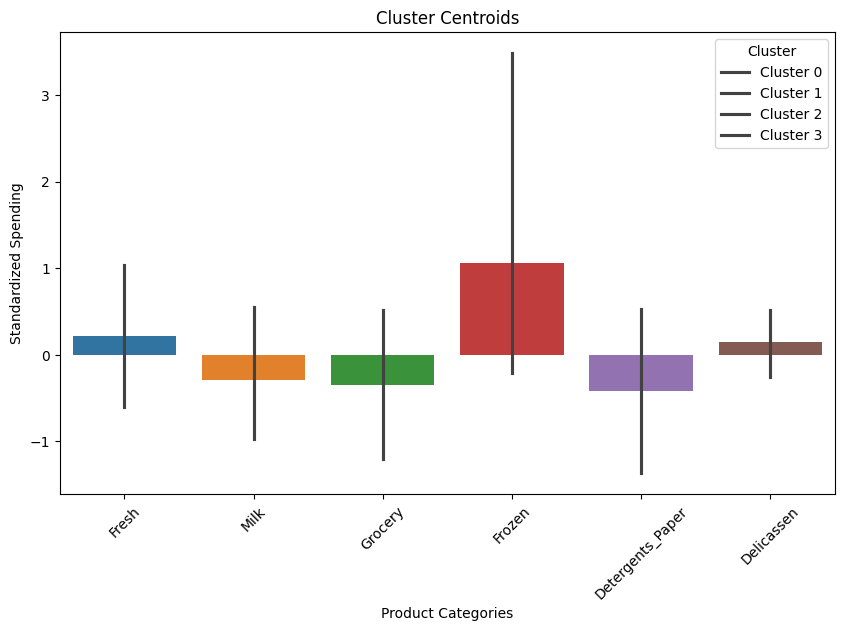

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the centroids
centroids = kmeans.cluster_centers_

# Create a DataFrame for centroids
centroids_df = pd.DataFrame(centroids, columns=normalized_data.columns)

# Plot the centroids
plt.figure(figsize=(10, 6))
sns.barplot(data=centroids_df)
plt.title('Cluster Centroids')
plt.xlabel('Product Categories')
plt.ylabel('Standardized Spending')
plt.xticks(rotation=45)
plt.legend(title='Cluster', labels=[f'Cluster {i}' for i in range(centroids_df.shape[0])])
plt.show()  # Display the plot

In [9]:
# Create a summary description for each cluster based on the centroids
cluster_descriptions = {}

for i in range(centroids_df.shape[0]):
    description = f"Cluster {i}: "
    for column in centroids_df.columns:
        spending = centroids_df.loc[i, column]
        description += f"{column} spending is {'high' if spending > 0 else 'low'}; "
    cluster_descriptions[i] = description.strip()

cluster_descriptions  # Display the descriptions for each cluster

{0: 'Cluster 0: Fresh spending is low; Milk spending is high; Grocery spending is high; Frozen spending is low; Detergents_Paper spending is low; Delicassen spending is high;',
 1: 'Cluster 1: Fresh spending is low; Milk spending is low; Grocery spending is high; Frozen spending is low; Detergents_Paper spending is high; Delicassen spending is low;',
 2: 'Cluster 2: Fresh spending is high; Milk spending is low; Grocery spending is low; Frozen spending is low; Detergents_Paper spending is low; Delicassen spending is high;',
 3: 'Cluster 3: Fresh spending is high; Milk spending is low; Grocery spending is low; Frozen spending is high; Detergents_Paper spending is low; Delicassen spending is high;'}